<a href="https://colab.research.google.com/github/droderuan/data-science-and-ml/blob/main/vai_academy/ruan_ferreira_case_resolution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ruan Ferreira Guimarães**

Olá! Este notebook contém a minha análise sobre o dataset fornecido e a tentativa de verificar as hipóteses levantadas no case. Eu também tive uma outra hipótese e deixei pra verificar-la em um segundo notebook ruan_ferreira_case_resolution_2.

# Hipóteses
* Mais consumidores estariam buscando por livros de não-ficção, indicando uma possível mudança de preferências dos leitores em geral.
* Outra hipótese trazida pelos donos da empresa é a diversificação de livros na lista de bestsellers ao longo dos anos, de forma que os livros estariam ficando menos tempo na lista de bestsellers com o passar do tempo. 
*  Por fim, a alta direção acredita que as notas médias dos livros possuem maior influência na quantidade de vendas e tempo na lista de bestsellers do que os seus preços.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vai_academy/módulo 02/case_resolution/bestsellers with categories.csv', sep=',')

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
# Há livros com nomes repetidos
df.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# Verificando a primeira hipótese
* Mais consumidores estariam buscando por livros de não-ficção, indicando uma possível mudança de preferências dos leitores em geral.

Como não há número de vendas no arquivo, estou considerando como premisa o número de reviews como quantidade de vendas. No e-commerce da Amazon, para realizar um review do produto, o usuário deve ter-lo comprado. Os produtos mais vendidos são também os com mais reviews pelos usuários.

In [ ]:
year_genre = pd.crosstab(index=df['Year'], columns=df["Genre"])
print(year_genre)
print(year_genre.describe())

Genre  Fiction  Non Fiction
Year                       
2009        24           26
2010        20           30
2011        21           29
2012        21           29
2013        24           26
2014        29           21
2015        17           33
2016        19           31
2017        24           26
2018        21           29
2019        20           30
Genre    Fiction  Non Fiction
count  11.000000    11.000000
mean   21.818182    28.181818
std     3.250175     3.250175
min    17.000000    21.000000
25%    20.000000    26.000000
50%    21.000000    29.000000
75%    24.000000    30.000000
max    29.000000    33.000000


Text(0.5, 1.0, 'Quantidade de ficção no top 50')

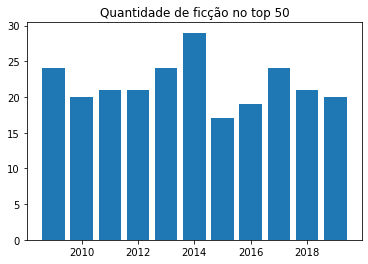

In [ ]:
plt.bar(year_genre.index, height=year_genre["Fiction"])
plt.title("Quantidade de ficção no top 50")
plt.show()

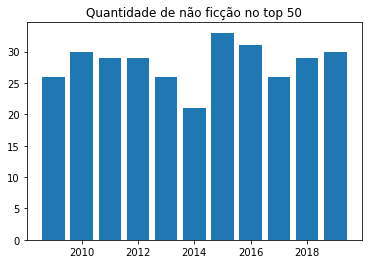

In [ ]:
plt.bar(year_genre.index, height=year_genre["Non Fiction"])
plt.title("Quantidade de não ficção no top 50")
plt.show()

Aparentemente o número de bestsellers se manteram estáveis. Não há como concluir com isso se o gosto do consumidor se alterou.
Agora irei verificar se isso se reflete no número de reviews (que estou considerando como um número de venda).

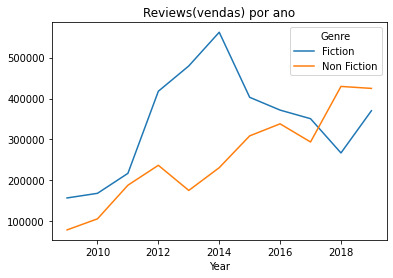

In [ ]:
fig, ax = plt.subplots()
grouped_by_year_genre = df.groupby(["Year", "Genre"])["Reviews"].sum().unstack().plot(ax=ax)
plt.title("Reviews (vendas) por ano")
plt.show()

Aqui já podemos verificar uma outra tendência. Conforme os anos, os números de venda **aumentaram** para livros de não ficção, o que é um indicativo que a primeira hipótese é verdadeira.



# Segunda hipótese
* Outra hipótese trazida pelos donos da empresa é a diversificação de livros na lista de bestsellers ao longo dos anos, de forma que os livros estariam ficando menos tempo na lista de bestsellers com o passar do tempo.

Com os dados que temos, é dificil verificar essa hipótese com precisão. Ao análisar a planilha, verifiquei que há livros com nome repetidos, ou seja, registro para cada ano em que esteve no top 50. Irei usar esses registros então para verificar a hipótese.

In [ ]:
# Aqui pego apenas as linhas onde o valor da coluna Nome se repete
all_duplicated_names = df[df["Name"].duplicated(keep=False)]

In [ ]:
def getYearsOnBestSellers(name, df_to_search):
  each_year = df_to_search[df_to_search["Name"] == name]
  first_year_on_top = each_year["Year"].min()
  years = (each_year["Year"].iloc[-1] - first_year_on_top) + 1
  return years

def addYearsOnBestSellersColumn(df):
  removed_dulicates = df[df["Name"].duplicated()].copy()
  removed_dulicates["years_on_best_sellers"] = removed_dulicates["Name"].apply(lambda name: getYearsOnBestSellers(name, df))

  return removed_dulicates

In [ ]:
df_with_years = addYearsOnBestSellersColumn(df)
df_with_years.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,years_on_best_sellers
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction,2
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction,2
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,2
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction,2
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction,3


Abaixo podemos ver que os livros de não ficção somam uma quantidade maior na permanência no top 50 da amazon.

In [ ]:
# Aqui vemos que os livros de não ficção possuem um tempo maior ao todo, quando
# somado os tempos por gênero 
df_with_years.groupby("Genre")["years_on_best_sellers"].sum()

Genre
Fiction        320
Non Fiction    589
Name: years_on_best_sellers, dtype: int64

Agora podemos ver que de fato os livros de não ficção ficam mais tempo, em média 1 ano a mais, do que os de ficção.

In [ ]:
df_with_years.groupby("Genre")["years_on_best_sellers"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Fiction,80.0,4.00000,2.110852,2.0,2.0,3.0,5.0,9.0
Non Fiction,119.0,4.94958,2.600028,1.0,3.0,5.0,6.0,10.0


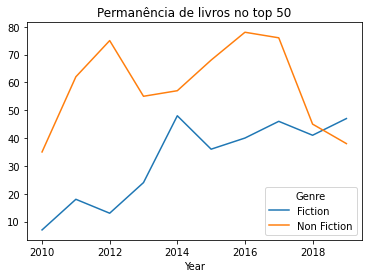

In [ ]:
fig, ax = plt.subplots()
_ = df_with_years.groupby(["Year", "Genre"])["years_on_best_sellers"].sum().unstack().plot(ax=ax)
plt.title("Permanência de livros no top 50")
plt.show()

No gráfico acima podemos verificar que de fato, os livros de não ficção estão permanecendo menos conforme os anos passam e sendo ultrapassados pelos de ficção. Vale a pena notar que mesmo em 2014, os livro de não ficção mesmo estando acima da outra categoria, **venderam menos**. Recapitulando o gráfico:

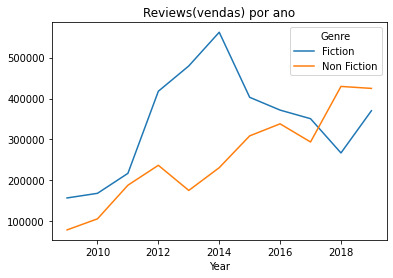

In [ ]:
fig, ax = plt.subplots()
grouped_by_year_genre = df.groupby(["Year", "Genre"])["Reviews"].sum().unstack().plot(ax=ax)
plt.title("Reviews (vendas) por ano")
plt.show()

Como vimos, os livros de ficção na realidade estão **permanencendo mais** conforme os anos passam, então não há como relacionar o tempo no top 50 com total de vendas. Porém ainda sim, em 2018, houve apenas 20 livros de ficção na lista e o total re reviews (vendas) diminuiu. Isso indica que esse valor alto em 2018 é dado a permanência de livros, ou seja, possui menos diversificação.

# Terceira hipótese
*  Por fim, a alta direção acredita que as notas médias dos livros possuem maior influência na quantidade de vendas e tempo na lista de bestsellers do que os seus preços.

Irei realizar o mesmo tratamento anteriormente, porém dessa vez mantendo as duplicatas para verificar contabilizar cada ano, não apenas o último.

In [ ]:
def getYearsOnBestSellersWithDuplicates(row, df_to_search):
  each_year = df_to_search[df_to_search["Name"] == row.loc["Name"]]
  first_year_on_top = each_year["Year"].min()
  years = (row["Year"] - first_year_on_top) + 1
  return years

def addYearsOnBestSellersColumnWithDuplicates(df):
  removed_dulicates = df.copy()
  removed_dulicates["years_on_best_sellers"] = removed_dulicates.apply(lambda row: getYearsOnBestSellersWithDuplicates(row, df), axis=1)

  return removed_dulicates

In [ ]:
df_with_years_with_duplicates = addYearsOnBestSellersColumnWithDuplicates(df)
df_with_years_with_duplicates.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,years_on_best_sellers
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1


In [ ]:
df_with_years_with_duplicates.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre,years_on_best_sellers
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,1
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,1
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,2
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,3
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction,4


In [ ]:
df_with_years_with_duplicates.corr()

,User Rating,Reviews,Price,Year,years_on_best_sellers
User Rating,1.000000,-0.001729,-0.133086,0.242383,0.023623
Reviews,-0.001729,1.000000,-0.109182,0.263560,0.137170
Price,-0.133086,-0.109182,1.000000,-0.153979,0.087993
Year,0.242383,0.263560,-0.153979,1.000000,0.263719
years_on_best_sellers,0.023623,0.137170,0.087993,0.263719,1.000000


In [ ]:
df_with_years_with_duplicates.groupby("User Rating")["Reviews"].mean()

User Rating
3.3     9372.000000
3.6    14982.000000
3.8    47265.000000
3.9    24666.000000
4.0    17376.142857
4.1    32384.166667
4.2     4283.500000
4.3     8362.880000
4.4     7038.973684
4.5     9231.116667
4.6     9260.038095
4.7    13660.925926
4.8    13840.110236
4.9    12957.423077
Name: Reviews, dtype: float64

In [ ]:
df_with_years_with_duplicates.groupby("User Rating")["years_on_best_sellers"].mean()

User Rating
3.3    1.000000
3.6    1.000000
3.8    1.500000
3.9    1.333333
4.0    3.785714
4.1    1.166667
4.2    1.000000
4.3    1.160000
4.4    1.500000
4.5    2.100000
4.6    1.657143
4.7    1.953704
4.8    1.692913
4.9    2.423077
Name: years_on_best_sellers, dtype: float64

Agora realizando um teste no dataframe com as duplicatas removidas

In [ ]:
df_with_years.groupby("User Rating")["years_on_best_sellers"].mean()

User Rating
3.8    2.000000
3.9    2.000000
4.0    7.800000
4.1    2.000000
4.3    2.000000
4.4    3.083333
4.5    6.333333
4.6    3.861111
4.7    4.302326
4.8    3.826087
4.9    6.125000
Name: years_on_best_sellers, dtype: float64

In [ ]:
df_with_years.groupby("User Rating")["Reviews"].mean()

User Rating
3.8    47265.000000
3.9    33844.000000
4.0    15509.400000
4.1    79446.000000
4.3     9341.000000
4.4     6158.166667
4.5    10922.238095
4.6    11817.972222
4.7    17189.139535
4.8    19361.326087
4.9    17630.708333
Name: Reviews, dtype: float64

In [ ]:
df_with_years.corr()

,User Rating,Reviews,Price,Year,years_on_best_sellers
User Rating,1.000000,0.046322,-0.278946,0.271549,-0.073156
Reviews,0.046322,1.000000,-0.232706,0.234232,-0.126223
Price,-0.278946,-0.232706,1.000000,-0.207163,0.281216
Year,0.271549,0.234232,-0.207163,1.000000,0.026508
years_on_best_sellers,-0.073156,-0.126223,0.281216,0.026508,1.000000


Somente ao remover as duplicatas podemos ver que as notas de usuários influênciam nos anos no top 50. Talvez seja por que a nota não mude e como os anos são incrementais (1, 2, 3..), isso faz com que vá para baixo a média com duplicatas. Outra coisa interessante é que a matriz de correlação junto das médias, mostram que não há uma boa correlação da avaliação com o número de reviews.

A última verificação será se o preço influência mais nesses dois atributos: tempo no top 50 e reviews

In [ ]:
def getPriceGroup(value, max_value, min_value, bins=4):
    bin_width = (max_value - min_value)/bins
    
    n_bins = (value - min_value)//bin_width 
    if n_bins == bins:                  
        n_bins -= 1                      
    
    lower_bound = min_value + bin_width*n_bins
    upper_bound = min_value + bin_width*(n_bins + 1)
    
    return str(lower_bound) + ' - ' + str(upper_bound)

In [ ]:
max_price = df_with_years["Price"].max()
min_price = df_with_years["Price"].min()

In [ ]:
df_with_years["price_group"] = df_with_years["Price"].apply(lambda price: getPriceGroup(price, max_price, min_price, 5))

In [ ]:
pd.crosstab(index=df_with_years["price_group"], columns=df_with_years["Genre"])

Genre,Fiction,Non Fiction
price_group,,
0.0 - 21.0,77,95
21.0 - 42.0,3,14
42.0 - 63.0,0,9
84.0 - 105.0,0,1


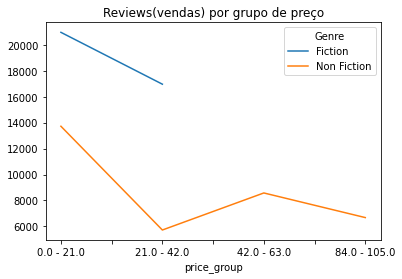

In [ ]:
fig, ax = plt.subplots()
grouped_by_year_genre = df_with_years.groupby(["price_group", "Genre"])["Reviews"].mean().unstack().plot(ax=ax)
plt.title("Reviews (vendas) por grupo de preço")
plt.show()

Se formos comparar agora usando a avaliação de usuários

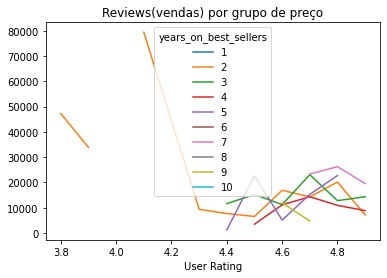

In [ ]:
fig, ax = plt.subplots()
grouped_by_year_genre = df_with_years.groupby(["User Rating", "years_on_best_sellers"])["Reviews"].mean().unstack().plot(ax=ax)
plt.title("Reviews (vendas) por grupo de preço")
plt.show()

In [ ]:
A nota não influência diretamente a quantidade de reviws (ou vendas)

Vimos que o preço de fato influência na quantidade de reviews (vendas) se tratando **apenas do gênero de ficção**. Aqui fiz com as duplicatas removidas, agora irei fazer com duplicatas.



In [ ]:
max_price = df_with_years_with_duplicates["Price"].max()
min_price = df_with_years_with_duplicates["Price"].min()

df_with_years_with_duplicates["price_group"] = df_with_years_with_duplicates["Price"].apply(lambda price: getPriceGroup(price, max_price, min_price, 5))

In [ ]:
pd.crosstab(index=df_with_years_with_duplicates["price_group"], columns=df_with_years_with_duplicates["Genre"])

Genre,Fiction,Non Fiction
price_group,,
0.0 - 21.0,222,260
21.0 - 42.0,15,36
42.0 - 63.0,2,12
63.0 - 84.0,1,0
84.0 - 105.0,0,2


In [ ]:
pd.crosstab(index=df_with_years_with_duplicates["price_group"], columns=df_with_years_with_duplicates["Genre"])

Genre,Fiction,Non Fiction
price_group,,
0.0 - 21.0,222,260
21.0 - 42.0,15,36
42.0 - 63.0,2,12
63.0 - 84.0,1,0
84.0 - 105.0,0,2


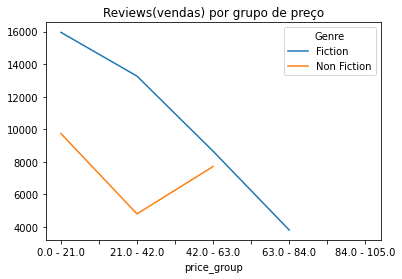

In [ ]:
fig, ax = plt.subplots()
grouped_by_year_genre = df_with_years_with_duplicates.groupby(["price_group", "Genre"])["Reviews"].mean().unstack().plot(ax=ax)
plt.title("Reviews(vendas) por grupo de preço")
plt.show()

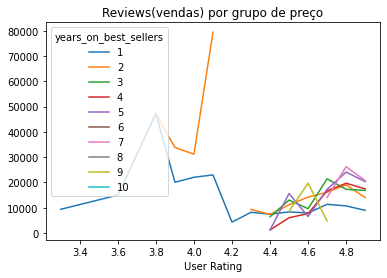

In [ ]:
fig, ax = plt.subplots()
grouped_by_year_genre = df_with_years_with_duplicates.groupby(["User Rating", "years_on_best_sellers"])["Reviews"].mean().unstack().plot(ax=ax)
plt.title("Reviews(vendas) por grupo de preço")
plt.show()

In [ ]:
# Por algum problemas, esses dois não estão exibindo no gráfico acima, mas ainda sim possuem uma quantidade de review baixo.
df_with_years_with_duplicates[df_with_years_with_duplicates["Price"] > 100]

,Name,Author,User Rating,Reviews,Price,Year,Genre,years_on_best_sellers,price_group
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,1,84.0 - 105.0
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction,2,84.0 - 105.0


Mesmo com duplicatas, podemos verificar que os livros de ficção mais baratos são mais vendidos, não dependendo apenas de sua nota.

# Conclusão

* Primeira hipótese: válida. Foi verificado que o número de vendas para os livros de ficção diminuiram conforme o tempo passou e foi ultrapassado pelos de não ficção em 2018.
* Segunda hipótese: inválida. Por mais que as vendas diminuiram, os livros de ficção permaneceram mais conforme o tempo passou.
* Terceira hipótese: inválida. Não foi constato nenhuma relação entre a nota do livro com seu número de vendas e permanência no top 50. 